This is the tutorial for basic analysis of COVID-19 data obtained from Johns Hopkins University covid data repository.

In this tutorial, we will go through following steps:


1.   We need data for analysis :). So we have to know from where we are getting our data. For this tutorial we are getting data from Johns Hopkins University covid data repository (source: https://github.com/CSSEGISandData/COVID-19).

2.   We will visualize the raw data.

3.   We will clean the data and make nice table so that it will be easier active for us to analyze the data.

4.   Since we have data only for conformed cases, death cases and recovery cases so using this we can calulate active cases and daily cases of Covid.

5.   We will make various plots for analysis and visualization.

# 1) Let's get the data from the source. Also we will import all the necessary library for our work to be done.


In [2]:
!pip install install pycountry
!pip install bar_chart_race
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pycountry
import bar_chart_race as bcr


We have imported all the necesary library. Now we will get the recent data from source using pandas.

# Get data from source

Data for Global conformed Covid

In [3]:
readConform_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

Data for Global Deaths due to Covid

In [4]:
readDeath_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')


Data for Global Recovery from Covid

In [5]:
readRec_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

# 2) Visualize the raw data

Conformed Cases

In [6]:
print(readConform_df.head(5))

  Province/State Country/Region       Lat  ...  11/24/20  11/25/20  11/26/20
0            NaN    Afghanistan  33.93911  ...     45280     45490     45716
1            NaN        Albania  41.15330  ...     34300     34944     35600
2            NaN        Algeria  28.03390  ...     77000     78025     79110
3            NaN        Andorra  42.50630  ...      6351      6428      6534
4            NaN         Angola -11.20270  ...     14742     14821     14920

[5 rows x 314 columns]


Death Cases Due to Covid

In [7]:
print(readDeath_df.head(5))

  Province/State Country/Region       Lat  ...  11/24/20  11/25/20  11/26/20
0            NaN    Afghanistan  33.93911  ...      1712      1725      1737
1            NaN        Albania  41.15330  ...       735       743       753
2            NaN        Algeria  28.03390  ...      2309      2329      2352
3            NaN        Andorra  42.50630  ...        76        76        76
4            NaN         Angola -11.20270  ...       338       340       341

[5 rows x 314 columns]


Recovery Cases from Covid

In [8]:
print(readRec_df.head(5))

  Province/State Country/Region       Lat  ...  11/24/20  11/25/20  11/26/20
0            NaN    Afghanistan  33.93911  ...     36122     36145     36232
1            NaN        Albania  41.15330  ...     16666     17031     17352
2            NaN        Algeria  28.03390  ...     50070     50712     51334
3            NaN        Andorra  42.50630  ...      5503      5542      5649
4            NaN         Angola -11.20270  ...      7444      7517      7617

[5 rows x 314 columns]


From above visualization we noticed that the format of the table is same. Later we will somehow merge the table with all the details of Conformed, Death and Recovered into one final table.

# 3) Clean the data to make nice table

In [9]:
conform_df_1 = readConform_df.melt(
    id_vars = ['Province/State', 'Country/Region'],
    value_vars = readConform_df.columns[4:],
    var_name = 'Date',
    value_name = 'Conformed'
)

In [10]:
deaths_df_1= readDeath_df.melt(
    id_vars = ['Province/State', 'Country/Region'],
    value_vars= readDeath_df.columns[4:],
    var_name = 'Date',
    value_name = 'Deaths'
)

In [11]:
recovered_df_1 = readRec_df.melt(
    id_vars = ['Province/State', 'Country/Region'],
    value_vars = readRec_df.columns[4:],
    var_name = 'Date',
    value_name = 'Recovered'
)

In [12]:
conform_df_1['Date'] = pd.to_datetime(conform_df_1['Date'])
conform_df_1['Date'] = conform_df_1['Date'].map(lambda x: x.strftime('%m/%d/%Y'))


In [13]:
deaths_df_1['Date'] = pd.to_datetime(deaths_df_1['Date'])
deaths_df_1['Date'] = deaths_df_1['Date'].map(lambda x: x.strftime('%m/%d/%Y'))



In [14]:
recovered_df_1['Date'] = pd.to_datetime(recovered_df_1['Date'])
recovered_df_1['Date'] = recovered_df_1['Date'].map(lambda x: x.strftime('%m/%d/%Y'))


In [15]:
#final_df = final_df.groupby(['Date', 'Country/Region'])['Conformed','Recovered','Deaths'].sum().reset_index()
conform_df_final = conform_df_1.groupby(['Date', 'Country/Region'])['Conformed'].sum().reset_index()
recovered_df_final = recovered_df_1.groupby(['Date', 'Country/Region'])['Recovered'].sum().reset_index()
deaths_df_final = deaths_df_1.groupby(['Date', 'Country/Region'])['Deaths'].sum().reset_index()

In [16]:
mergeCon_Dth = conform_df_final.merge(right=recovered_df_final, how='left', on=['Date', 'Country/Region'])
final_df = mergeCon_Dth.merge(right=deaths_df_final, how='left', on=['Date', 'Country/Region'])

In [17]:
final_df = final_df.rename(columns={'Country/Region':'Countries'})



#4) Calulate active cases and daily cases of Covid

In [18]:
singleday_1 = final_df.groupby(['Countries', 'Date'])['Conformed', 'Recovered', 'Deaths']
singleday_1 = singleday_1.sum().diff().reset_index().fillna(0)
#singleday_1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [19]:
singleday_2 = singleday_1.rename(columns={'Conformed':'Conform-daily'})
singleday_2 = singleday_2.rename(columns={'Recovered':'Recover-daily'})
singleday_2 = singleday_2.rename(columns={'Deaths':'Death-daily'})
#singleday_2


In [20]:
final_df = pd.merge(final_df, singleday_2, on=['Date', 'Countries'])

In [21]:
final_df

,Date,Countries,Conformed,Recovered,Deaths,Conform-daily,Recover-daily,Death-daily
0,01/22/2020,Afghanistan,0,0,0,0.0,0.0,0.0
1,01/22/2020,Albania,0,0,0,-45716.0,-36232.0,-1737.0
2,01/22/2020,Algeria,0,0,0,-35600.0,-17352.0,-753.0
3,01/22/2020,Andorra,0,0,0,-79110.0,-51334.0,-2352.0
4,01/22/2020,Angola,0,0,0,-6534.0,-5649.0,-76.0
...,...,...,...,...,...,...,...,...
59205,11/26/2020,West Bank and Gaza,78493,61241,680,1766.0,742.0,15.0
59206,11/26/2020,Western Sahara,10,8,1,0.0,0.0,0.0
59207,11/26/2020,Yemen,2137,1484,612,13.0,10.0,1.0
59208,11/26/2020,Zambia,17553,16779,357,18.0,24.0,0.0


In [22]:
final_num = final_df._get_numeric_data()

In [23]:
final_num[final_num < 0] = 0

In [24]:
final_df['Active'] = final_df['Conformed']- (final_df['Deaths']+final_df['Recovered'])


# Analysis and visualization

# World: Total cases

In [25]:
worlCount = final_df.groupby(['Date'])['Conformed', 'Recovered','Deaths', 'Active', 'Conform-daily', 'Recover-daily', 'Death-daily'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Text(0, 0.5, 'Number of people')

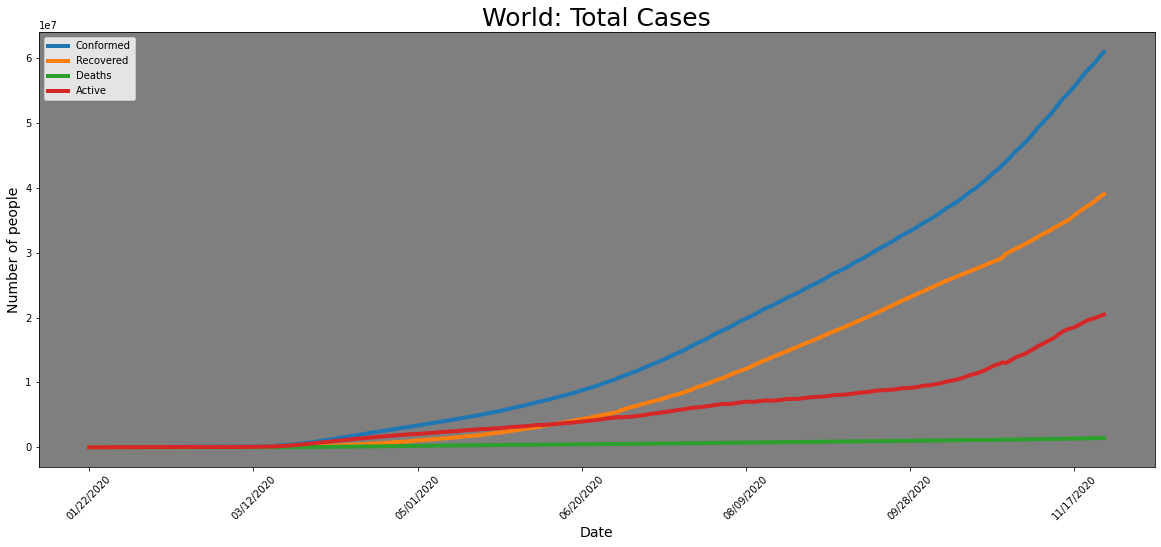

In [26]:
fig, ax = plt.subplots(figsize=(20,8))
worlCount.plot(x='Date', y='Conformed',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Recovered',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Deaths',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Active',linewidth=4, ax=ax)
ax.set_facecolor("black")
ax.set_title('World: Total Cases', fontsize=25)
ax.patch.set_alpha(0.5)
plt.xticks(size=10, rotation=45)
plt.xlabel('Date', size=14)
plt.ylabel('Number of people', size=14)

# World: Total daily cases

Text(0, 0.5, 'Number of people')

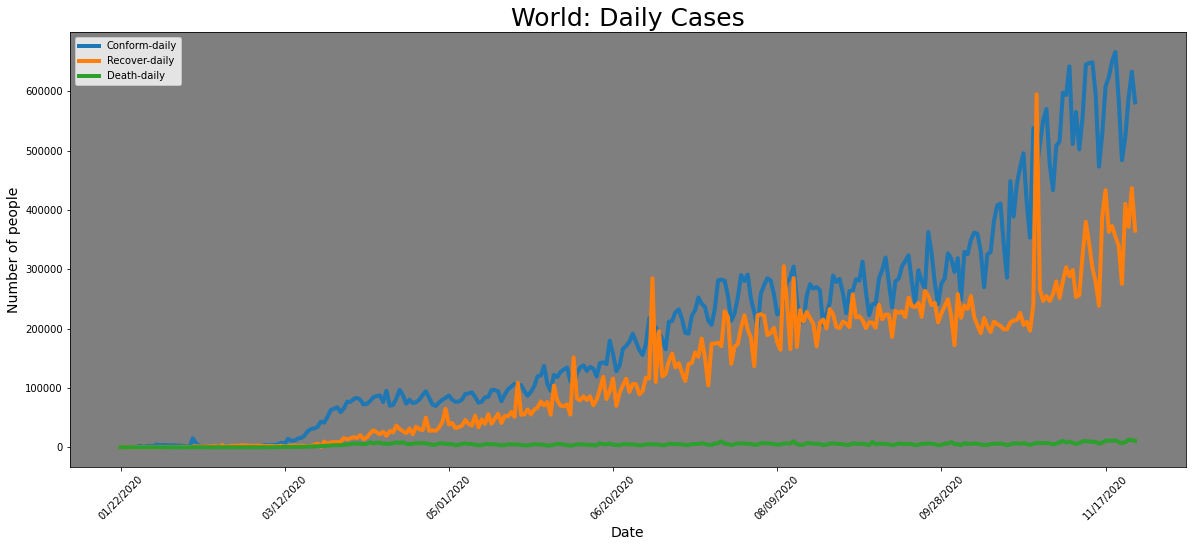

In [27]:
fig, ax = plt.subplots(figsize=(20,8))
worlCount.plot(x='Date', y='Conform-daily',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Recover-daily',linewidth=4, ax=ax)
worlCount.plot(x='Date', y='Death-daily',linewidth=4, ax=ax)
ax.set_title('World: Daily Cases', fontsize=25)
ax.set_facecolor("black")
ax.patch.set_alpha(0.5)
plt.xticks(size=10, rotation=45)
plt.xlabel('Date', size=14)
plt.ylabel('Number of people', size=14)

#World: Total Daily Cases Animation

In [28]:
mapCasebyCountry = final_df.groupby(['Date', 'Countries'])['Conformed', 'Recovered','Deaths', 'Active', 'Conform-daily', 'Recover-daily', 'Death-daily'].sum().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [29]:
countryList = mapCasebyCountry['Countries'].unique().tolist()
countryCode = {}
for i in countryList:
    try:
        country_data = pycountry.countries.search_fuzzy(i)
        country_code = country_data[0].alpha_3
        countryCode.update({i: country_code})

    except:
       countryCode.update({i: ' '})



In [30]:
for country, code in countryCode.items():
    mapCasebyCountry.loc[(mapCasebyCountry.Countries == country), 'iso_alpha'] = code

In [31]:
fig = px.choropleth(data_frame = mapCasebyCountry,
                    locations = 'iso_alpha',
                    color = 'Conform-daily',
                    color_continuous_scale = 'RdYlGn_r',
                    animation_frame = 'Date',
                    labels = {'Conformed':'Covid development from January 2020'})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})


# Race Chart for Daily Cases

In [121]:
race_df = final_df.rename(columns={ final_df.columns[0]: "Date" })
race_df = race_df.set_index('Date')
select_five_country = race_df[(race_df['Countries']=='China') | (race_df['Countries']=='India') | (race_df['Countries']=='US') | (race_df['Countries']=='Germany') | (race_df['Countries']=='Brazil')]
race_total_Conformed = select_five_country.pivot_table(index='Date', columns='Countries', values='Conformed')

In [ ]:
fig, ax= plt.subplots(1, 1, figsize=(10, 7), dpi=120)
fig.subplots_adjust(left=0.2, bottom=0.2 )
ax.set_xlabel('Number of Cases', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

cases_bcr_html = bcr.bar_chart_race(
    df=race_total_Conformed,
    filename='test.mp4',
    n_bars = 5,
    orientation = 'h',
    cmap = 'dark12',
    steps_per_period = 20,
    period_length=100,
    bar_label_size=18,
    filter_column_colors = True,
    tick_label_size=18,
    label_bars=True,
    scale='linear',
    bar_size=.95,
    figsize=(7, 5),
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center', 'size':18},
    title='Covid-19 Devlopment from January 2020', fig=fig)

from IPython.display import HTML
from base64 import b64encode
mp4_vid = open('/content/test.mp4','rb').read()
decode_video = "data:video/mp4;base64," + b64encode(mp4_vid).decode()
HTML(f'<video width=600 controls><source src={decode_video} type="video/mp4"></video>')